In [148]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [149]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [150]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [151]:
train.shape,test.shape

((330045, 7), (141448, 6))

In [152]:
train.Tag.nunique()

10

In [153]:
train['Answerbyviews']=train['Views']/train['Answers']

In [154]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Answerbyviews
0,52664,a,3942.0,2.0,155623,7855.0,42.0,3927.500000
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,4650.083333
2,468453,c,1358.0,4.0,56177,8067.0,60.0,2016.750000
3,96996,a,264.0,3.0,168793,27064.0,9.0,9021.333333
4,131465,c,4271.0,4.0,112223,13986.0,83.0,3496.500000


In [155]:
train.corr()

,ID,Reputation,Answers,Username,Views,Upvotes,Answerbyviews
ID,1.000000,0.008546,0.017448,0.000628,0.017400,0.006328,0.019093
Reputation,0.008546,1.000000,0.066504,-0.041019,0.036455,0.266710,0.001801
Answers,0.017448,0.066504,1.000000,-0.012197,0.498642,0.202033,0.081778
Username,0.000628,-0.041019,-0.012197,1.000000,0.002306,-0.011970,0.010011
Views,0.017400,0.036455,0.498642,0.002306,1.000000,0.437336,0.619279
Upvotes,0.006328,0.266710,0.202033,-0.011970,0.437336,1.000000,0.186973
Answerbyviews,0.019093,0.001801,0.081778,0.010011,0.619279,0.186973,1.000000


In [156]:
z=[None]*len(train['Answers'])
k=0
for i in range(len(train['Answers'])):
    if train['Answers'][i]==76:
        z[k]=train['Reputation'][i]
        k=k+1

In [157]:
pd.crosstab(train['Answers'],train['Upvotes']).head(10)

Upvotes,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,286529.0,296862.0,308308.0,317555.0,360073.0,445709.0,460447.0,483995.0,588966.0,615278.0
Answers,,,,,,,,,,,,,,,,,,,,,
0.0,261,297,272,248,145,124,86,76,64,48,...,0,0,0,0,0,0,0,0,0,0
1.0,2888,4093,4117,4137,3754,3135,2691,2444,2128,1874,...,0,0,0,0,0,0,0,0,0,0
2.0,2129,3127,3205,3276,3086,2761,2400,2270,2036,1903,...,0,0,0,0,0,0,0,0,0,0
3.0,1108,1669,1781,1851,1826,1629,1558,1514,1358,1315,...,0,0,0,0,0,0,0,0,0,0
4.0,542,817,919,935,964,872,894,804,826,752,...,0,0,0,0,0,0,0,0,0,0
5.0,249,421,468,503,446,486,520,463,444,391,...,0,0,0,0,0,0,0,0,0,0
6.0,121,185,207,218,244,271,254,258,245,242,...,0,0,0,0,0,0,0,0,0,0
7.0,64,95,99,120,137,134,125,125,111,133,...,0,0,0,0,0,0,0,0,0,0
8.0,33,49,65,58,68,66,75,75,61,63,...,0,0,0,0,0,0,0,0,0,0


In [159]:
train['voteforanswer']=train['Answers'].apply(lambda x:0 if(x>0) else 1)

In [160]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Answerbyviews,voteforanswer
0,52664,a,3942.0,2.0,155623,7855.0,42.0,3927.500000,0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,4650.083333,0
2,468453,c,1358.0,4.0,56177,8067.0,60.0,2016.750000,0
3,96996,a,264.0,3.0,168793,27064.0,9.0,9021.333333,0
4,131465,c,4271.0,4.0,112223,13986.0,83.0,3496.500000,0


In [161]:
train.skew()

ID               -0.000298
Reputation       11.230027
Answers           3.380169
Username          0.142088
Views            14.370704
Upvotes          74.249689
Answerbyviews          NaN
voteforanswer    12.471199
dtype: float64

In [162]:
train['rep_ans_view']=train.groupby(['Reputation','Answers'])['Views'].transform('mean')

In [163]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Answerbyviews,voteforanswer,rep_ans_view
0,52664,a,3942.0,2.0,155623,7855.0,42.0,3927.500000,0,4642.375000
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,4650.083333,0,55801.000000
2,468453,c,1358.0,4.0,56177,8067.0,60.0,2016.750000,0,10401.250000
3,96996,a,264.0,3.0,168793,27064.0,9.0,9021.333333,0,17322.476190
4,131465,c,4271.0,4.0,112223,13986.0,83.0,3496.500000,0,35250.666667


In [164]:
train.corr()

,ID,Reputation,Answers,Username,Views,Upvotes,Answerbyviews,voteforanswer,rep_ans_view
ID,1.000000,0.008546,0.017448,0.000628,0.017400,0.006328,0.019093,-0.001533,0.013241
Reputation,0.008546,1.000000,0.066504,-0.041019,0.036455,0.266710,0.001801,-0.011622,0.039760
Answers,0.017448,0.066504,1.000000,-0.012197,0.498642,0.202033,0.081778,-0.087203,0.543846
Username,0.000628,-0.041019,-0.012197,1.000000,0.002306,-0.011970,0.010011,0.004010,-0.002501
Views,0.017400,0.036455,0.498642,0.002306,1.000000,0.437336,0.619279,-0.026682,0.916881
Upvotes,0.006328,0.266710,0.202033,-0.011970,0.437336,1.000000,0.186973,-0.006756,0.443305
Answerbyviews,0.019093,0.001801,0.081778,0.010011,0.619279,0.186973,1.000000,NaN,0.407230
voteforanswer,-0.001533,-0.011622,-0.087203,0.004010,-0.026682,-0.006756,NaN,1.000000,-0.029101
rep_ans_view,0.013241,0.039760,0.543846,-0.002501,0.916881,0.443305,0.407230,-0.029101,1.000000


In [165]:
train['rep_ans_view_sum']=train.groupby(['Reputation','Answers'])['Views'].transform('sum')
train['rep_ans_view_max']=train.groupby(['Reputation','Answers'])['Views'].transform('max')
train['rep_ans_view_min']=train.groupby(['Reputation','Answers'])['Views'].transform('min')

In [166]:
train.corr()

,ID,Reputation,Answers,Username,Views,Upvotes,Answerbyviews,voteforanswer,rep_ans_view,rep_ans_view_sum,rep_ans_view_max,rep_ans_view_min
ID,1.000000,0.008546,0.017448,0.000628,0.017400,0.006328,0.019093,-0.001533,0.013241,0.000682,0.007476,0.010544
Reputation,0.008546,1.000000,0.066504,-0.041019,0.036455,0.266710,0.001801,-0.011622,0.039760,-0.057453,-0.045121,0.053650
Answers,0.017448,0.066504,1.000000,-0.012197,0.498642,0.202033,0.081778,-0.087203,0.543846,0.019711,0.253117,0.514522
Username,0.000628,-0.041019,-0.012197,1.000000,0.002306,-0.011970,0.010011,0.004010,-0.002501,0.134775,0.094329,-0.008782
Views,0.017400,0.036455,0.498642,0.002306,1.000000,0.437336,0.619279,-0.026682,0.916881,0.034612,0.457949,0.867576
Upvotes,0.006328,0.266710,0.202033,-0.011970,0.437336,1.000000,0.186973,-0.006756,0.443305,-0.001435,0.194083,0.440696
Answerbyviews,0.019093,0.001801,0.081778,0.010011,0.619279,0.186973,1.000000,NaN,0.407230,0.021921,0.251097,0.333260
voteforanswer,-0.001533,-0.011622,-0.087203,0.004010,-0.026682,-0.006756,NaN,1.000000,-0.029101,-0.018876,-0.039822,-0.014706
rep_ans_view,0.013241,0.039760,0.543846,-0.002501,0.916881,0.443305,0.407230,-0.029101,1.000000,0.037750,0.499464,0.946225
rep_ans_view_sum,0.000682,-0.057453,0.019711,0.134775,0.034612,-0.001435,0.021921,-0.018876,0.037750,1.000000,0.737540,-0.009145


In [167]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Answerbyviews,voteforanswer,rep_ans_view,rep_ans_view_sum,rep_ans_view_max,rep_ans_view_min
0,52664,a,3942.0,2.0,155623,7855.0,42.0,3927.500000,0,4642.375000,37139.0,8983.0,2295.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,4650.083333,0,55801.000000,55801.0,55801.0,55801.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0,2016.750000,0,10401.250000,83210.0,29113.0,2549.0
3,96996,a,264.0,3.0,168793,27064.0,9.0,9021.333333,0,17322.476190,363772.0,82028.0,84.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0,3496.500000,0,35250.666667,105752.0,72701.0,13986.0


In [168]:
#cumulative_sum = train.groupby('Tag')["Upvotes"].cumsum() - train["Upvotes"]
#cumulative_count = train.groupby('Tag').cumcount()
#train['Tag' + "_mean_target"] = cumulative_sum/cumulative_count

In [169]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Answerbyviews,voteforanswer,rep_ans_view,rep_ans_view_sum,rep_ans_view_max,rep_ans_view_min
0,52664,a,3942.0,2.0,155623,7855.0,42.0,3927.500000,0,4642.375000,37139.0,8983.0,2295.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,4650.083333,0,55801.000000,55801.0,55801.0,55801.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0,2016.750000,0,10401.250000,83210.0,29113.0,2549.0
3,96996,a,264.0,3.0,168793,27064.0,9.0,9021.333333,0,17322.476190,363772.0,82028.0,84.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0,3496.500000,0,35250.666667,105752.0,72701.0,13986.0


In [170]:
train.isnull().sum()

ID                  0
Tag                 0
Reputation          0
Answers             0
Username            0
Views               0
Upvotes             0
Answerbyviews       0
voteforanswer       0
rep_ans_view        0
rep_ans_view_sum    0
rep_ans_view_max    0
rep_ans_view_min    0
dtype: int64

In [171]:
train["Tag"] = train["Tag"].astype('category')
train.dtypes

ID                     int64
Tag                 category
Reputation           float64
Answers              float64
Username               int64
Views                float64
Upvotes              float64
Answerbyviews        float64
voteforanswer          int64
rep_ans_view         float64
rep_ans_view_sum     float64
rep_ans_view_max     float64
rep_ans_view_min     float64
dtype: object

In [172]:
train["Tag"] = train["Tag"].cat.codes
train.head(10)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Answerbyviews,voteforanswer,rep_ans_view,rep_ans_view_sum,rep_ans_view_max,rep_ans_view_min
0,52664,0,3942.0,2.0,155623,7855.0,42.0,3927.500000,0,4642.375000,37139.0,8983.0,2295.0
1,327662,0,26046.0,12.0,21781,55801.0,1175.0,4650.083333,0,55801.000000,55801.0,55801.0,55801.0
2,468453,1,1358.0,4.0,56177,8067.0,60.0,2016.750000,0,10401.250000,83210.0,29113.0,2549.0
3,96996,0,264.0,3.0,168793,27064.0,9.0,9021.333333,0,17322.476190,363772.0,82028.0,84.0
4,131465,1,4271.0,4.0,112223,13986.0,83.0,3496.500000,0,35250.666667,105752.0,72701.0,13986.0
5,345568,7,440.0,1.0,23866,5577.0,4.0,5577.000000,0,7489.325000,299573.0,90147.0,35.0
6,376865,1,147.0,1.0,10759,17184.0,17.0,17184.000000,0,4316.173913,198544.0,28635.0,31.0
7,467378,4,2269.0,2.0,54623,312.0,3.0,156.000000,0,2257.625000,18061.0,9926.0,189.0
8,393640,4,111.0,2.0,172926,53738.0,79.0,26869.000000,0,11599.313253,962743.0,91868.0,55.0
9,130054,1,2749.0,1.0,10189,227.0,0.0,227.000000,0,227.000000,227.0,227.0,227.0


In [173]:
train['voteforanswer']=train['voteforanswer'].astype('int64')

In [174]:
train.dtypes

ID                    int64
Tag                    int8
Reputation          float64
Answers             float64
Username              int64
Views               float64
Upvotes             float64
Answerbyviews       float64
voteforanswer         int64
rep_ans_view        float64
rep_ans_view_sum    float64
rep_ans_view_max    float64
rep_ans_view_min    float64
dtype: object

In [175]:
train.corr()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Answerbyviews,voteforanswer,rep_ans_view,rep_ans_view_sum,rep_ans_view_max,rep_ans_view_min
ID,1.000000,-0.004725,0.008546,0.017448,0.000628,0.017400,0.006328,0.019093,-0.001533,0.013241,0.000682,0.007476,0.010544
Tag,-0.004725,1.000000,-0.024017,-0.064710,0.012590,-0.011807,-0.004300,-0.002059,0.010716,-0.015101,-0.005070,-0.008288,-0.009994
Reputation,0.008546,-0.024017,1.000000,0.066504,-0.041019,0.036455,0.266710,0.001801,-0.011622,0.039760,-0.057453,-0.045121,0.053650
Answers,0.017448,-0.064710,0.066504,1.000000,-0.012197,0.498642,0.202033,0.081778,-0.087203,0.543846,0.019711,0.253117,0.514522
Username,0.000628,0.012590,-0.041019,-0.012197,1.000000,0.002306,-0.011970,0.010011,0.004010,-0.002501,0.134775,0.094329,-0.008782
Views,0.017400,-0.011807,0.036455,0.498642,0.002306,1.000000,0.437336,0.619279,-0.026682,0.916881,0.034612,0.457949,0.867576
Upvotes,0.006328,-0.004300,0.266710,0.202033,-0.011970,0.437336,1.000000,0.186973,-0.006756,0.443305,-0.001435,0.194083,0.440696
Answerbyviews,0.019093,-0.002059,0.001801,0.081778,0.010011,0.619279,0.186973,1.000000,NaN,0.407230,0.021921,0.251097,0.333260
voteforanswer,-0.001533,0.010716,-0.011622,-0.087203,0.004010,-0.026682,-0.006756,NaN,1.000000,-0.029101,-0.018876,-0.039822,-0.014706
rep_ans_view,0.013241,-0.015101,0.039760,0.543846,-0.002501,0.916881,0.443305,0.407230,-0.029101,1.000000,0.037750,0.499464,0.946225


In [176]:
train['tag_reputation_mean']=train.groupby(['Reputation','Answers','Tag'])['Views'].transform('mean')
train['tag_reputation_sum']=train.groupby(['Reputation','Answers','Tag'])['Views'].transform('sum')
train['tag_reputation_min']=train.groupby(['Reputation','Answers','Tag'])['Views'].transform('min')
train['tag_reputation_max']=train.groupby(['Reputation','Answers','Tag'])['Views'].transform('max')

In [177]:
train.corr()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Answerbyviews,voteforanswer,rep_ans_view,rep_ans_view_sum,rep_ans_view_max,rep_ans_view_min,tag_reputation_mean,tag_reputation_sum,tag_reputation_min,tag_reputation_max
ID,1.000000,-0.004725,0.008546,0.017448,0.000628,0.017400,0.006328,0.019093,-0.001533,0.013241,0.000682,0.007476,0.010544,0.015796,0.004414,0.014452,0.014210
Tag,-0.004725,1.000000,-0.024017,-0.064710,0.012590,-0.011807,-0.004300,-0.002059,0.010716,-0.015101,-0.005070,-0.008288,-0.009994,-0.012332,-0.030549,-0.006318,-0.010261
Reputation,0.008546,-0.024017,1.000000,0.066504,-0.041019,0.036455,0.266710,0.001801,-0.011622,0.039760,-0.057453,-0.045121,0.053650,0.038077,-0.035097,0.044630,0.003236
Answers,0.017448,-0.064710,0.066504,1.000000,-0.012197,0.498642,0.202033,0.081778,-0.087203,0.543846,0.019711,0.253117,0.514522,0.520819,0.097906,0.516451,0.400201
Username,0.000628,0.012590,-0.041019,-0.012197,1.000000,0.002306,-0.011970,0.010011,0.004010,-0.002501,0.134775,0.094329,-0.008782,-0.000204,0.109270,-0.008991,0.056661
Views,0.017400,-0.011807,0.036455,0.498642,0.002306,1.000000,0.437336,0.619279,-0.026682,0.916881,0.034612,0.457949,0.867576,0.957419,0.171887,0.927658,0.766048
Upvotes,0.006328,-0.004300,0.266710,0.202033,-0.011970,0.437336,1.000000,0.186973,-0.006756,0.443305,-0.001435,0.194083,0.440696,0.438330,0.059550,0.433210,0.333684
Answerbyviews,0.019093,-0.002059,0.001801,0.081778,0.010011,0.619279,0.186973,1.000000,NaN,0.407230,0.021921,0.251097,0.333260,0.507253,0.109372,0.451228,0.453439
voteforanswer,-0.001533,0.010716,-0.011622,-0.087203,0.004010,-0.026682,-0.006756,NaN,1.000000,-0.029101,-0.018876,-0.039822,-0.014706,-0.027869,-0.018947,-0.019852,-0.035485
rep_ans_view,0.013241,-0.015101,0.039760,0.543846,-0.002501,0.916881,0.443305,0.407230,-0.029101,1.000000,0.037750,0.499464,0.946225,0.957659,0.162853,0.940718,0.747769


In [178]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Answerbyviews,voteforanswer,rep_ans_view,rep_ans_view_sum,rep_ans_view_max,rep_ans_view_min,tag_reputation_mean,tag_reputation_sum,tag_reputation_min,tag_reputation_max
0,52664,0,3942.0,2.0,155623,7855.0,42.0,3927.500000,0,4642.375000,37139.0,8983.0,2295.0,8004.50,16009.0,7855.0,8154.0
1,327662,0,26046.0,12.0,21781,55801.0,1175.0,4650.083333,0,55801.000000,55801.0,55801.0,55801.0,55801.00,55801.0,55801.0,55801.0
2,468453,1,1358.0,4.0,56177,8067.0,60.0,2016.750000,0,10401.250000,83210.0,29113.0,2549.0,8067.00,8067.0,8067.0,8067.0
3,96996,0,264.0,3.0,168793,27064.0,9.0,9021.333333,0,17322.476190,363772.0,82028.0,84.0,20167.25,80669.0,1640.0,35013.0
4,131465,1,4271.0,4.0,112223,13986.0,83.0,3496.500000,0,35250.666667,105752.0,72701.0,13986.0,13986.00,13986.0,13986.0,13986.0


In [181]:
train.skew()

ID                     -0.000298
Tag                     0.337230
Reputation             11.230027
Answers                 3.380169
Username                0.142088
Views                  14.370704
Upvotes                74.249689
Answerbyviews                NaN
voteforanswer          12.471199
rep_ans_view           16.911645
rep_ans_view_sum        7.768845
rep_ans_view_max        8.035362
rep_ans_view_min       19.088664
tag_reputation_mean    15.425522
tag_reputation_sum      9.521311
tag_reputation_min     16.264629
tag_reputation_max     10.135939
dtype: float64

In [183]:
train.max()

ID                       471493.0
Tag                           9.0
Reputation              1042428.0
Answers                      76.0
Username                 175738.0
Views                   5231058.0
Upvotes                  615278.0
Answerbyviews                 inf
voteforanswer                 1.0
rep_ans_view            5231058.0
rep_ans_view_sum       25965381.0
rep_ans_view_max        5231058.0
rep_ans_view_min        5231058.0
tag_reputation_mean     5231058.0
tag_reputation_sum      7563623.0
tag_reputation_min      5231058.0
tag_reputation_max      5231058.0
dtype: float64

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize

X_train = train.drop("Upvotes", axis=1)
X_train = X_train.drop("ID", axis=1)
Y_train = train["Upvotes"].values
#X_test = test.drop("ID", axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(np_scaled)

#min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(X_test)
X_test = pd.DataFrame(np_scaled)

In [135]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, ExtraTreesRegressor,GradientBoostingRegressor

In [185]:
X=train.drop(['ID'],axis=1)
X=X.drop(['Upvotes'],axis=1)
X=X.drop(['Answerbyviews'],axis=1)
y=train['Upvotes']

In [186]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.1)

In [190]:
model=RandomForestRegressor()

In [191]:
model.fit(xtrain,ytrain)

RandomForestRegressor()

Feature ranking:
1. feature 1 (0.580707)
2. feature 4 (0.183998)
3. feature 6 (0.090755)
4. feature 10 (0.041394)
5. feature 9 (0.019884)
6. feature 7 (0.013234)
7. feature 3 (0.012910)
8. feature 11 (0.011553)
9. feature 13 (0.011437)
10. feature 8 (0.009582)
11. feature 12 (0.009260)
12. feature 2 (0.007741)
13. feature 0 (0.007545)
14. feature 5 (0.000001)


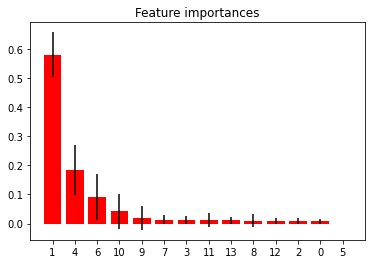

In [195]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [196]:
xtrain.head()

,Tag,Reputation,Answers,Username,Views,voteforanswer,rep_ans_view,rep_ans_view_sum,rep_ans_view_max,rep_ans_view_min,tag_reputation_mean,tag_reputation_sum,tag_reputation_min,tag_reputation_max
51709,6,610.0,2.0,146035,9964.0,0,16910.300000,338206.0,68127.0,504.0,17637.500,70550.0,3350.0,30327.0
189024,3,2818.0,1.0,29025,559.0,0,3221.333333,48320.0,20784.0,170.0,1910.625,15285.0,427.0,5260.0
257080,8,3816.0,9.0,42692,165521.0,0,159003.000000,318006.0,165521.0,152485.0,165521.000,165521.0,165521.0,165521.0
302632,8,6290.0,9.0,59348,54157.0,0,54157.000000,54157.0,54157.0,54157.0,54157.000,54157.0,54157.0,54157.0
96230,5,15600.0,2.0,64444,7139.0,0,10289.000000,51445.0,25554.0,3950.0,7139.000,7139.0,7139.0,7139.0


In [198]:
preds=model.predict(xtest)

In [200]:
preds[0:5]

array([ 3.8 , 94.39, 37.  , 79.67, 15.46])